# Task 1
- Loading data using pandas

This code is using the Pandas library in Python. Pandas is great for working with data, kind of like a super-powered Excel for programming.

`import pandas as pd:` This line brings in the Pandas library and gives it the nickname "pd" so that it's easier to refer to later in the code.

`data = pd.read_csv('stock_data.csv', sep=','):` Here, it's reading a CSV (Comma Separated Values) file named 'stock_data.csv'. The pd.read_csv() function reads the CSV file and creates a DataFrame, which is like a table with rows and columns. The file name ('stock_data.csv') is inside the parentheses, and sep=',' tells Pandas that the columns in the CSV file are separated by commas. The resulting DataFrame is stored in a variable named data.

In [72]:
import pandas as pd # importing pandas library
data = pd.read_csv('stock_data.csv', sep=',') # reading our CSV data file


In [73]:
data.sample(5)

,date,open,high,low,close,volume,Name
452001,2015-07-13,113.82,114.4500,113.60,113.89,1424049,PH
301657,2013-10-29,16.34,16.6925,16.29,16.62,11113561,IPG
350419,2015-02-18,72.23,72.7500,72.12,72.52,3765331,LOW
61449,2017-09-29,26.04,26.0400,24.55,24.88,8422256,ARNC
6015,2016-12-28,78.86,79.2200,78.21,78.35,862078,ABC


In [61]:
# drop the unwanted columns and just keep date, close, Name columns
data = data.drop(['open', 'high', 'low', 'volume'], axis=1)
data.head()

,date,close,Name
0,2013-02-08,14.75,AAL
1,2013-02-11,14.46,AAL
2,2013-02-12,14.27,AAL
3,2013-02-13,14.66,AAL
4,2013-02-14,13.99,AAL


# Task 2

This code takes a DataFrame (data), accesses the 'Name' column, finds unique names, sorts them alphabetically, and then prints out the total count of unique names, the first five names in alphabetical order, and the last five names in alphabetical order.

In [62]:
# Get unique names from a column and sort them alphabetically
unique_names = sorted(data['Name'].unique())  # Collect unique names and sort them alphabetically
num_names = len(unique_names)  # Count the number of unique names
first_5_names = unique_names[:5]  # Select the first five names from the sorted list
last_5_names = unique_names[-5:]  # Select the last five names from the sorted list

# Output the results
print("Number of unique names:", num_names)
print("First 5 names:", first_5_names)
print("Last 5 names:", last_5_names)


Number of unique names: 505
First 5 names: ['A', 'AAL', 'AAP', 'AAPL', 'ABBV']
Last 5 names: ['XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']


# Task 3
This code first converts the 'Date' column in the DataFrame data to a datetime format. Then, it filters the data based on specific date criteria (between July 1, 2014, and June 30, 2017) and creates a new DataFrame called filtered_data. Finally, it identifies the names that were removed due to the date criteria and calculates the count of unique names that remain after filtering.

In [74]:
# Convert 'Date' column to datetime format
data['date'] = pd.to_datetime(data['date'])  # Convert the 'date' column to a datetime format

# Filter names based on date criteria
filtered_data = data.groupby('Name').filter(
    lambda x: (x['date'].min() <= pd.Timestamp('2014-07-01')) and (x['date'].max() >= pd.Timestamp('2017-06-30'))
)  # Select names based on date criteria: between July 1, 2014, and June 30, 2017

# Find removed names and count remaining unique names
removed_names = sorted(set(data['Name'].unique()) - set(filtered_data['Name'].unique()))  # Names removed due to date criteria
num_remaining_names = len(filtered_data['Name'].unique())  # Count of remaining unique names

# Output the results
print("Names removed:", removed_names)
print("Number of remaining names:", num_remaining_names)



Names removed: ['APTV', 'BHF', 'BHGE', 'CFG', 'CSRA', 'DWDP', 'DXC', 'EVHC', 'FTV', 'HLT', 'HPE', 'HPQ', 'KHC', 'PYPL', 'QRVO', 'SYF', 'UA', 'WLTW', 'WRK']
Number of remaining names: 486


# Task 4

This code takes the previously filtered data (filtered_data), specifically focuses on the 'date' column, and filters dates within a certain range (from July 1, 2014, to June 30, 2017). Then, it collects unique dates, counts them, and displays the total count of unique dates along with the first five and last five dates in that range.

In [78]:
# Filter dates based on specific criteria
filtered_dates = filtered_data[
    (filtered_data['date'] >= pd.Timestamp('2014-07-01')) & (filtered_data['date'] <= pd.Timestamp('2017-06-30'))
]  # Select dates between July 1, 2014, and June 30, 2017

# Find unique dates and count them
unique_dates = sorted(filtered_dates['date'].unique())  # Collect unique dates and sort them
num_dates = len(unique_dates)  # Count the number of unique dates

# Select the first five and last five dates
first_5_dates = unique_dates[:5]  # Get the first five dates
last_5_dates = unique_dates[-5:] # Get the last five dates

# Output the results
print("Number of dates:", num_dates)
print("First 5 dates:", first_5_dates) 
print("Last 5 dates:", last_5_dates)



Number of dates: 757
First 5 dates: [Timestamp('2014-07-01 00:00:00'), Timestamp('2014-07-02 00:00:00'), Timestamp('2014-07-03 00:00:00'), Timestamp('2014-07-07 00:00:00'), Timestamp('2014-07-08 00:00:00')]
Last 5 dates: [Timestamp('2017-06-26 00:00:00'), Timestamp('2017-06-27 00:00:00'), Timestamp('2017-06-28 00:00:00'), Timestamp('2017-06-29 00:00:00'), Timestamp('2017-06-30 00:00:00')]


# Task 5
 it rearranges the data so that you have dates as rows, names as columns, and the 'close' prices as the values where the rows and columns intersect. The resulting DataFrame pivot_data will show the close prices for each 'Name' across various dates. The print(pivot_data) line displays this newly structured DataFrame.

In [65]:
# Build a new DataFrame with close values for each name and date
pivot_data = filtered_data.pivot(index='date', columns='Name', values='close')
print(pivot_data)


Name            A    AAL     AAP      AAPL    ABBV    ABC    ABT     ACN  \
date                                                                       
2013-02-08  45.08  14.75   78.90   67.8542   36.25  46.89  34.41   73.31   
2013-02-11  44.60  14.46   78.39   68.5614   35.85  46.76  34.26   73.07   
2013-02-12  44.62  14.27   78.60   66.8428   35.42  46.96  34.30   73.37   
2013-02-13  44.75  14.66   78.97   66.7156   35.27  46.64  34.46   73.56   
2013-02-14  44.58  13.99   78.84   66.6556   36.57  46.77  34.70   73.13   
...           ...    ...     ...       ...     ...    ...    ...     ...   
2018-02-01  72.83  53.88  117.29  167.7800  116.34  99.29  62.18  160.46   
2018-02-02  71.25  52.10  113.93  160.5000  115.17  96.02  61.69  156.90   
2018-02-05  68.22  49.76  109.86  156.4900  109.51  91.90  58.73  151.83   
2018-02-06  68.45  51.18  112.20  163.0300  111.20  91.54  58.86  154.69   
2018-02-07  68.06  51.40  109.93  159.5400  113.62  94.22  58.67  155.15   

Name       

# Task 6
- This code calculates daily returns for each stock based on the 'close' prices in the filtered_data DataFrame. It iterates through each unique 'Name', computes daily returns using the formula 
`(today’s close price−yesterday’s close price)/yesterday’s close price` and stores these returns in dictionaries.
- Then it filters out stocks that don't have the expected number of returns (1258 assuming daily data for about 5 years) and creates a DataFrame returns_df containing the calculated returns for those specific stocks.
- Finally, it displays this DataFrame.

In [66]:
returns_data = {}  # Initialize an empty dictionary to store returns for each stock

# Loop through unique 'Name's in filtered_data
for name in filtered_data['Name'].unique():
    temp = filtered_data[filtered_data['Name'] == name].sort_values('date')  # Select data for each 'Name' and sort by 'date'
    temp['Return'] = (temp['close'] - temp['close'].shift(1)) / temp['close'].shift(1)  # Calculate daily returns
    returns_data[name] = temp['Return'].values[1:]  # Store calculated returns in the dictionary

returns_data_2 = {}  # Initialize another dictionary for filtered returns

# Loop through items in returns_data
for item, value in returns_data.items():
    if len(value) == 1258:  # Check if the number of returns is 1258 (assuming daily data for about 5 years)
        returns_data_2[item] = value  # Store returns with correct length in another dictionary

returns_df = pd.DataFrame(returns_data_2)  # Create a DataFrame using the filtered returns
print(returns_df)



           AAL      AAPL       AAP      ABBV       ABC       ABT       ACN  \
0    -0.019661  0.010422 -0.006464 -0.011034 -0.002772 -0.004359 -0.003274   
1    -0.013140 -0.025067  0.002679 -0.011994  0.004277  0.001168  0.004106   
2     0.027330 -0.001903  0.004707 -0.004235 -0.006814  0.004665  0.002590   
3    -0.045703 -0.000899 -0.001646  0.036859  0.002787  0.006965 -0.005846   
4     0.036455 -0.013780  0.002029  0.027618 -0.003635  0.010951  0.014085   
...        ...       ...       ...       ...       ...       ...       ...   
1253 -0.008100  0.002090  0.002564  0.036714 -0.003813  0.000322 -0.001493   
1254 -0.033036 -0.043390 -0.028647 -0.010057 -0.032934 -0.007880 -0.022186   
1255 -0.044914 -0.024984 -0.035724 -0.049145 -0.042908 -0.047982 -0.032314   
1256  0.028537  0.041792  0.021300  0.015432 -0.003917  0.002214  0.018837   
1257  0.004299 -0.021407 -0.020232  0.021763  0.029277 -0.003228  0.002974   

          ADBE       ADI       ADM  ...      XLNX        XL    

# Task 7
- This code uses the scikit-learn library to perform Principal Component Analysis (PCA) on the returns_df DataFrame. PCA is a technique used for reducing the dimensionality of the data while preserving important information.

- The code initializes a PCA model, fits it to the data after dropping any rows containing NaN values in the returns_df, and then prints the top five principal components (PCs) based on their eigenvalues. Each principal component represents a combination of the original features (in this case, stock returns) that captures the most variance in the data.
- The output displays these top five principal components.

In [67]:
from sklearn.decomposition import PCA

# Calculate principal components
pca = PCA()  # Initialize PCA
pca.fit(returns_df.dropna())  # Fit PCA model after dropping NaN values in returns_df

# Print top five principal components by eigenvalue
top_five_PCs = pca.components_[:5]  # Extract the top five principal components
print("Top five principal components:")
for i, pc in enumerate(top_five_PCs, 1):  # Iterate through top five principal components
    print(f"PC {i}: {pc}")  # Print each principal component

Top five principal components:
PC 1: [-0.06154344 -0.03575026 -0.04082382 -0.04428523 -0.03123988 -0.04186983
 -0.04100358 -0.04745652 -0.05150925 -0.04410849 -0.03944184 -0.05935342
 -0.05231216 -0.01916509 -0.01768358 -0.04454455 -0.04099773 -0.03789563
 -0.04428702 -0.0490284  -0.02688059 -0.03913435 -0.03518099 -0.05651144
 -0.05196104 -0.05211518 -0.05344595 -0.0323755  -0.06081755 -0.05644659
 -0.07144624 -0.04837125 -0.0498351  -0.07174829 -0.06677247 -0.03230961
 -0.0450047  -0.05565301 -0.04416137 -0.03778181 -0.03795661 -0.05259522
 -0.06857915 -0.07224292 -0.04374346 -0.04417918 -0.02799599 -0.06840279
 -0.0451304  -0.02287851 -0.06030615 -0.0440058  -0.01703203 -0.04169799
 -0.05349897 -0.03021643 -0.05224152 -0.06173329 -0.0310169  -0.04436811
 -0.04750183 -0.04961454 -0.03218304 -0.06317031 -0.03104749 -0.05662315
 -0.0535087  -0.06052347 -0.03822948 -0.03946551 -0.04240533 -0.06506495
 -0.03330097 -0.0263595  -0.04082961 -0.05080044 -0.04241976 -0.06230246
 -0.02288843 -

# Task 8
- This code snippet uses Matplotlib, a plotting library in Python, to visualize the explained variance ratios for the principal components obtained from the PCA analysis.

- First, it calculates the explained variance ratios for each principal component obtained from the PCA (explained_variance_ratios). Then, it calculates and prints the percentage of variance explained by the first principal component.

- Finally, it creates a plot displaying the explained variance ratios for the top 20 principal components. The x-axis represents the principal components, and the y-axis represents the corresponding explained variance ratios. The plot shows how much variance in the data each principal component explains, helping to understand the significance of each component in capturing the data's variability.

Percentage of variance explained by the first PC: 27.09%


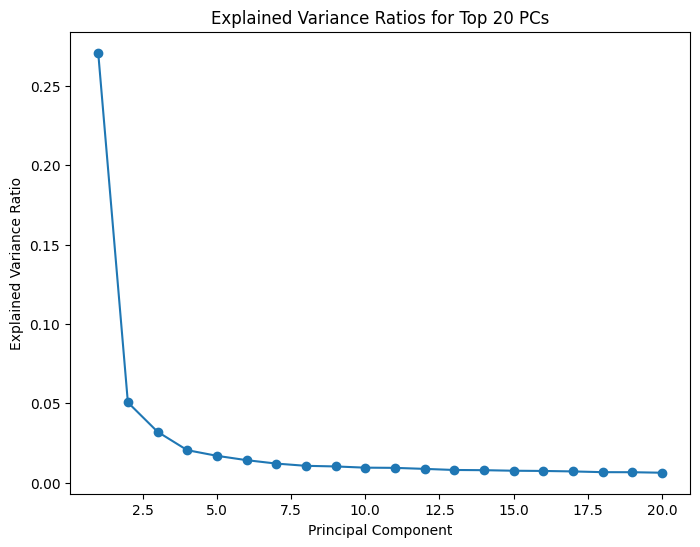

In [68]:
import matplotlib.pyplot as plt

# Extract explained variance ratios from PCA
explained_variance_ratios = pca.explained_variance_ratio_  # Extract explained variance ratios

# Calculate percentage of variance explained by the first principal component
variance_explained = explained_variance_ratios[0] * 100  # Calculate variance explained by the first PC
print(f"Percentage of variance explained by the first PC: {variance_explained:.2f}%")

# Plot explained variance ratios for the top 20 principal components
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(range(1, 21), explained_variance_ratios[:20], marker='o')  # Plot explained variance ratios for the top 20 PCs
plt.xlabel('Principal Component')  # Set x-axis label
plt.ylabel('Explained Variance Ratio')  # Set y-axis label
plt.title('Explained Variance Ratios for Top 20 PCs')  # Set plot title
plt.show()  # Display the plot



# Task 9
- This code calculates the cumulative sum of the explained variance ratios obtained from PCA using NumPy's cumsum() function. Then, it creates a plot to visualize the cumulative variance ratios for each principal component.

- The x-axis represents the principal components, and the y-axis represents the cumulative variance ratios. This plot helps in understanding how many principal components are required to reach a certain level of cumulative variance. The red dashed line indicates 95% explained variance, showing the number of principal components needed to explain at least 95% of the variability in the data.


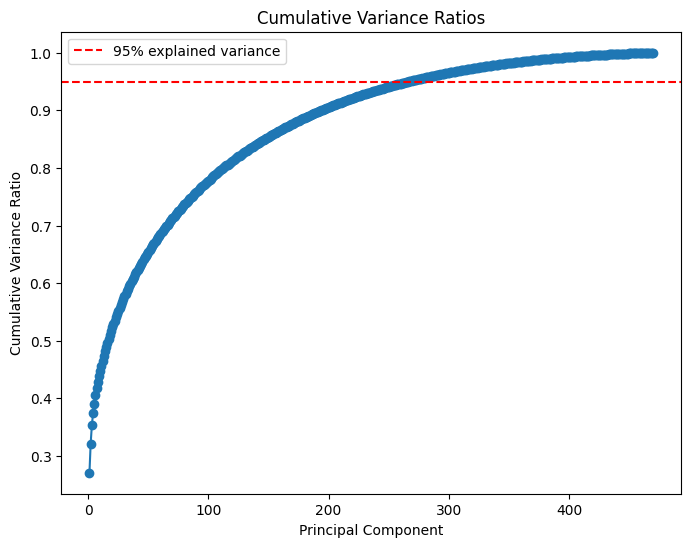

In [69]:
import numpy as np

# Calculate cumulative variance ratios
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)  # Calculate cumulative sum of explained variance ratios

# Plot cumulative variance ratios
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(range(1, len(cumulative_variance_ratios) + 1), cumulative_variance_ratios, marker='o')  # Plot cumulative variance ratios
plt.xlabel('Principal Component')  # Set x-axis label
plt.ylabel('Cumulative Variance Ratio')  # Set y-axis label
plt.title('Cumulative Variance Ratios')  # Set plot title
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')  # Add a horizontal line at 95% explained variance
plt.legend()  # Show the legend
plt.show()  # Display the plot



# Task 10
- This code snippet introduces data normalization using StandardScaler from scikit-learn. It normalizes the returns data by transforming it to have a mean of 0 and a standard deviation of 1 for each feature (column).

- Then, it applies PCA to the normalized returns data. The subsequent steps, similar to the previous visualization, calculate and plot the cumulative variance ratios for the principal components derived from the PCA on the normalized data. The red dashed line represents the 95% explained variance threshold.
- This plot demonstrates the cumulative variance explained by each principal component after normalizing the data, providing insights into how normalization impacts the explained variance by the principal components.

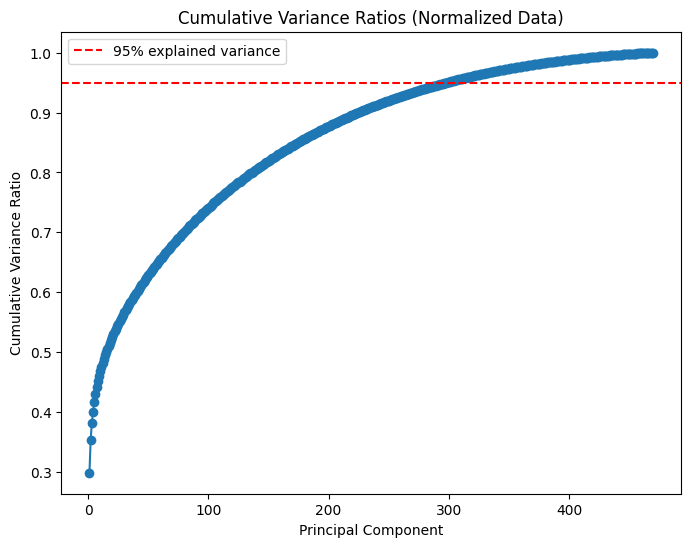

In [70]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for normalization

# Normalizing the returns DataFrame
scaler = StandardScaler()  # Initialize StandardScaler
normalized_returns = scaler.fit_transform(returns_df.dropna())  # Normalize the returns data after dropping NaN values

# Applying PCA to normalized data
pca_normalized = PCA()  # Initialize PCA for normalized data
pca_normalized.fit(normalized_returns)  # Fit PCA to the normalized returns data

# Extract explained variance ratios for normalized data
explained_variance_ratios_normalized = pca_normalized.explained_variance_ratio_  # Extract explained variance ratios

# Calculate cumulative variance ratios for normalized data
cumulative_variance_ratios_normalized = np.cumsum(explained_variance_ratios_normalized)  # Calculate cumulative variance ratios

# Plot cumulative variance ratios for normalized data
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(range(1, len(cumulative_variance_ratios_normalized) + 1), cumulative_variance_ratios_normalized, marker='o')  # Plot cumulative variance ratios
plt.xlabel('Principal Component')  # Set x-axis label
plt.ylabel('Cumulative Variance Ratio')  # Set y-axis label
plt.title('Cumulative Variance Ratios (Normalized Data)')  # Set plot title
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')  # Add a horizontal line at 95% explained variance
plt.legend()  # Show the legend
plt.show()  # Display the plot
